# Loan Prediction Notebook

Loading of libraries

In [87]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# data visualization
import seaborn as sns
from matplotlib import pyplot as plt
plt.style.use('seaborn-whitegrid')
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
import re
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold
#Parameter Tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

Loading and Summarizing Data

In [88]:
data = pd.read_csv("H:/projects/fun/datascience/machine Learning/classification/loan_predictor2/data/train.csv")
evaluation_data = pd.read_csv("H:/projects/fun/datascience/machine Learning/classification/loan_predictor2/data/test.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [89]:
# let's see how our response variable is distributed 
data['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

# Variables

Variable - Description

Loan_ID: Unique Loan ID

Gender: Male/ Female

Married: Applicant married (Y/N)

Dependents: Number of dependents

Education: Applicant Education (Graduate/ Under Graduate)

Self_Employed: Self employed (Y/N)

ApplicantIncome: Applicant income

CoapplicantIncome: Coapplicant income

LoanAmount: Loan amount in thousands

Loan_Amount_Term: Term of loan in months

Credit_History: credit history meets guidelines

Property_Area: Urban/ Semi Urban/ Rural

Loan_Status: Loan approved (Y/N)

In [90]:
print(data.shape)
data.describe().transpose()

(614, 13)


,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


Exploration, Feature Engineering And Data Cleaning

In [91]:
#Lets Look At Missing Data
total = data.isnull().sum().sort_values(ascending=False)
percent_1 = data.isnull().sum()/data.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total Missing', '%'])
missing_data.head(13)

,Total Missing,%
Credit_History,50,8.1
Self_Employed,32,5.2
LoanAmount,22,3.6
Dependents,15,2.4
Loan_Amount_Term,14,2.3
Gender,13,2.1
Married,3,0.5
Loan_Status,0,0.0
Property_Area,0,0.0
CoapplicantIncome,0,0.0


In [92]:
#Clean both train and test set

#Train Data
data['LoanAmount'].fillna(data['LoanAmount'].mean(),inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0],inplace=True)
#Fill 'No' to Self Employed
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0],inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0],inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0],inplace=True)
data['Gender'].fillna(data['Gender'].mode()[0],inplace=True)
data['Married'].fillna(data['Married'].mode()[0],inplace=True)
    
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [93]:
def encode_labels(df, cols = None):
    '''
    Inputs:
        df: a pandas dataframe containing the column for which to calculate target encoding (categ_col)
        cols: all columns' names for which to do label encoding . If is None (default) then all object columns are taken.
    Output: df with cols replaced the coresponding label encodings while maintaining all existing None values at their positions.
    '''

    le = LabelEncoder()
    for col in cols:
        # pick some random value from the col - will make it null back at the end anyway
        null_replacement = df[col].values[0]
        # save col null positions and set ones for the rest
        nan_col = np.array([1 if not pd.isnull(x) else x for x in df[col]])
        # replace nulls in the original array, and fit on it
        a = np.array([x if not pd.isnull(x) else null_replacement for x in df[col]])
        le.fit(a)
        # transform the data and add the nulls back
        df[col] = le.transform(a) * nan_col

    return(df) 

In [94]:
#Convert Categorical features into numerics.
data = encode_labels(data, cols = ['Gender','Married','Education','Self_Employed','Loan_Status'])
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,Urban,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,Urban,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,Urban,1


In [95]:
#One-hot encoding
def one_hot_encoding(df, cols):
    for col in cols:
        encoded_columns = pd.get_dummies(df[col], prefix=[col])
        df = df.join(encoded_columns).drop(col, axis=1)

    return df

In [96]:
data = one_hot_encoding(data, ['Property_Area', 'Dependents'])
data.head()

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,['Property_Area']_Rural,['Property_Area']_Semiurban,['Property_Area']_Urban,['Dependents']_0,['Dependents']_1,['Dependents']_2,['Dependents']_3+
0,LP001002,1,0,0,0,5849,0.0,146.412162,360.0,1.0,1,0,0,1,1,0,0,0
1,LP001003,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,1,0,0,0,1,0,0
2,LP001005,1,1,0,1,3000,0.0,66.000000,360.0,1.0,1,0,0,1,1,0,0,0
3,LP001006,1,1,1,0,2583,2358.0,120.000000,360.0,1.0,1,0,0,1,1,0,0,0
4,LP001008,1,0,0,0,6000,0.0,141.000000,360.0,1.0,1,0,0,1,1,0,0,0


In [97]:
#Convert Gender from string to integers
data['Credit_History'] = data['Credit_History'].astype('int64')
data.head()

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,['Property_Area']_Rural,['Property_Area']_Semiurban,['Property_Area']_Urban,['Dependents']_0,['Dependents']_1,['Dependents']_2,['Dependents']_3+
0,LP001002,1,0,0,0,5849,0.0,146.412162,360.0,1,1,0,0,1,1,0,0,0
1,LP001003,1,1,0,0,4583,1508.0,128.000000,360.0,1,0,1,0,0,0,1,0,0
2,LP001005,1,1,0,1,3000,0.0,66.000000,360.0,1,1,0,0,1,1,0,0,0
3,LP001006,1,1,1,0,2583,2358.0,120.000000,360.0,1,1,0,0,1,1,0,0,0
4,LP001008,1,0,0,0,6000,0.0,141.000000,360.0,1,1,0,0,1,1,0,0,0


# ========== Building The Models ===========

In [98]:
def split_data_to_train_and_test(df, response_col, list_cols_to_remove, test_size = 0.2, random_state=0, standardize_x=False, standardize_y=False):
    from sklearn.model_selection import train_test_split
    df = df.drop(columns=list_cols_to_remove)
    y = df[response_col].values
    X = df.drop(response_col, axis=1).values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    from sklearn.preprocessing import StandardScaler
    std = StandardScaler()
    if standardize_x:
        X_train = std.fit_transform(X_train)
        X_test = std.transform(X_test)
    if standardize_y:
        y_train = std.fit_transform(y_train)
        y_test = std.transform(y_test)
    return X_train, X_test, y_train, y_test

In [99]:
X_train, X_test, Y_train, Y_test = split_data_to_train_and_test(data, 'Loan_Status', ['Loan_ID'], test_size = 0.2, random_state=100, standardize_x=True, standardize_y=False)

# Cross-Validation

In [100]:
#Classification KFold algorithm cross validation
def classification_kfold_cross_validation(algorithm_dict, kfold_splits, random_state, X, Y):
    result_dfs = []
    for name, model in algorithm_dict.items():
        kfold = KFold(n_splits=kfold_splits, random_state=random_state)
        results_kfold = cross_val_score(model, X, Y, cv=kfold)
        results_kfold_av_accuracy = "Accuracy: %.2f%% (std %.2f%%)" % (results_kfold.mean()*100.0, results_kfold.std()*100.0)

        data = {'Algorithm Name':  [name],
        'Accuracy': [results_kfold_av_accuracy]}
        df = pd.DataFrame (data, columns = ['Algorithm Name','Accuracy'])
        result_dfs.append(df)

    result_df = (pd.concat(result_dfs)).sort_values(by='Accuracy', ascending=False)
    result_df = result_df.set_index('Algorithm Name')
    return result_df

In [101]:
#Classification KFold algorithm cross validation
models = {}
models['Logistic Regression'] = LogisticRegression(solver='liblinear', max_iter=100)
models['K-Neighbors Classifier'] = KNeighborsClassifier(n_neighbors = 3)
#models['Random Forest Classifier'] = RandomForestClassifier(n_estimators = 180,random_state = 42, max_features = "auto", min_samples_leaf = 10, oob_score = True, n_jobs = -1, max_depth=10)
models['Random Forest Classifier'] = RandomForestClassifier(bootstrap= True, max_depth=3, max_features=6, min_samples_split=10, n_estimators=398, random_state=44)
models['Decision Tree Classifier'] = DecisionTreeClassifier()
models['SGD Classifier'] = linear_model.SGDClassifier(max_iter=5, tol=None)
models['Gaussian Naive Bayes'] = GaussianNB()
models['Perceptron'] = Perceptron(max_iter=100)
models['Linear Support Vector Machine'] = SVC(kernel='linear')

classification_kfold_cross_validation(models, 10, None, X_train, Y_train).head(50)

,Accuracy
Algorithm Name,
Random Forest Classifier,Accuracy: 82.89% (std 4.50%)
Linear Support Vector Machine,Accuracy: 82.89% (std 4.50%)
Logistic Regression,Accuracy: 82.29% (std 4.81%)
Gaussian Naive Bayes,Accuracy: 80.25% (std 5.74%)
K-Neighbors Classifier,Accuracy: 78.22% (std 4.78%)
Perceptron,Accuracy: 74.54% (std 6.20%)
SGD Classifier,Accuracy: 72.51% (std 7.44%)
Decision Tree Classifier,Accuracy: 70.27% (std 5.36%)


In [102]:
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

model = RandomForestClassifier()

# define grid search
param_grid = {'n_estimators':[70,100,180],'criterion':['gini','entropy'],'verbose':[0,4,10],'warm_start':['False','True'], 'random_state':[42,72,100,200]}
cvvv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
cv = KFold(n_splits=10, random_state=None)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, Y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.804571 using {'criterion': 'gini', 'n_estimators': 180, 'random_state': 42, 'verbose': 0, 'warm_start': 'False'}
0.794367 (0.044731) with: {'criterion': 'gini', 'n_estimators': 70, 'random_state': 42, 'verbose': 0, 'warm_start': 'False'}
0.794367 (0.044731) with: {'criterion': 'gini', 'n_estimators': 70, 'random_state': 42, 'verbose': 0, 'warm_start': 'True'}
0.794367 (0.044731) with: {'criterion': 'gini', 'n_estimators': 70, 'random_state': 42, 'verbose': 4, 'warm_start': 'False'}
0.794367 (0.044731) with: {'criterion': 'gini', 'n_estimators': 70, 'random_state': 42, 'verbose': 4, 'warm_start': 'True'}
0.794367 (0.044731) with: {'criterion': 'gini', 'n_estimators': 70, 'random_state': 42, 'verbose': 10, 'warm_start': 'False'}
0.794367 (0.044731) with: {'criterion': 'gini', 'n_estimators': 70, 'random_state': 42, 'verbose': 10, 'warm_start': 'True'}
0.796286 (0.043955) with: {'criterion': 'gini', 'n_estimators': 70, 'random_state': 72, 'verbose': 0, 'warm_start': 'False'}
0.796

In [103]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

rf = RandomForestClassifier()
# specify parameters and distributions to sample from
#param_dist = {"max_depth": [3, None], "max_features": sp_randint(1, X_train.shape[1]), "min_samples_split": sp_randint(2, 11),"bootstrap": [True, False], "random_state": sp_randint(10, 100), "n_estimators": sp_randint(100,500)}
#random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=10, cv=5)
#random_search.fit(X_train, Y_train)
#print(random_search.best_params_)

In [104]:
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as sp_randint

rfg = RandomForestClassifier()
# specify parameters and distributions to sample from
#cv = KFold(n_splits=10, random_state=None)
#param_dist = {"max_depth": [3, None], "max_features": range(1, X_train.shape[1]+1), "min_samples_split": range(2, 12),"bootstrap": [True, False], "random_state": range(10, 101), "n_estimators": range(100,501)}
#grid_search = GridSearchCV(estimator=rfg, param_grid=param_dist, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
#grid_search.fit(X_train, Y_train)
#print(grid_search.best_params_)

# Feature Selection

In [105]:
import time
start = time.process_time()
trainedforest = RandomForestClassifier(bootstrap= True, max_depth=3, min_samples_split=10, n_estimators=700, random_state=44).fit(X_train,Y_train)
print(time.process_time() - start)
predictionforest = trainedforest.predict(X_test)
print(confusion_matrix(Y_test,predictionforest))
print(classification_report(Y_test,predictionforest))

0.9375
[[18 30]
 [ 3 72]]
              precision    recall  f1-score   support

           0       0.86      0.38      0.52        48
           1       0.71      0.96      0.81        75

    accuracy                           0.73       123
   macro avg       0.78      0.67      0.67       123
weighted avg       0.76      0.73      0.70       123



In [106]:
X = data.drop(['Loan_Status', 'Loan_ID'], axis=1)
X.columns

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       '['Property_Area']_Rural', '['Property_Area']_Semiurban',
       '['Property_Area']_Urban', '['Dependents']_0', '['Dependents']_1',
       '['Dependents']_2', '['Dependents']_3+'],
      dtype='object')

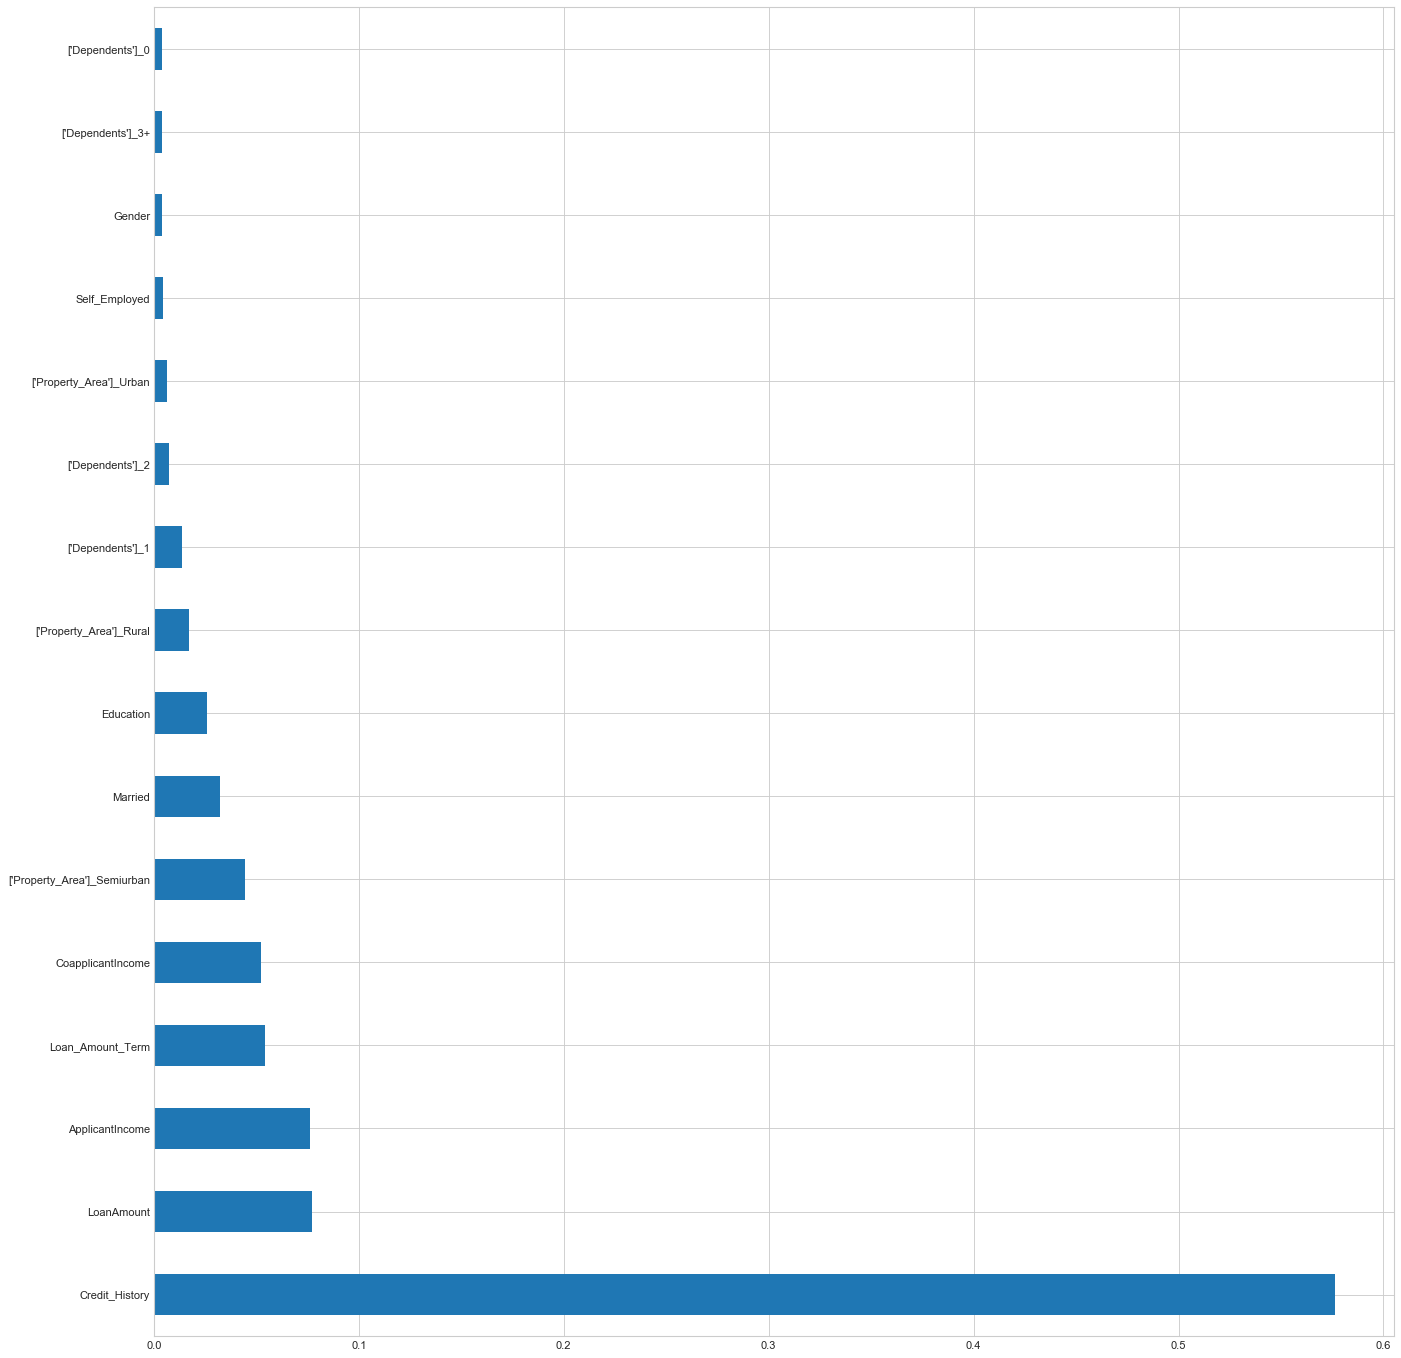

In [107]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 22), dpi=80, facecolor='w', edgecolor='k')

feat_importances = pd.Series(trainedforest.feature_importances_, index= X.columns)
feat_importances.nlargest(19).plot(kind='barh')

In [108]:
X_Reduced = X[['Credit_History','ApplicantIncome', 'LoanAmount','CoapplicantIncome']]
from sklearn.preprocessing import StandardScaler
X_Reduced = StandardScaler().fit_transform(X_Reduced)
Y = data['Loan_Status'].values
X_Train2, X_Test2, Y_Train2, Y_Test2 = train_test_split(X_Reduced, Y, test_size = 0.20, random_state = 101)

In [109]:
start = time.process_time()
trainedforest = RandomForestClassifier(bootstrap= True, max_depth=3, min_samples_split=10, n_estimators=398, random_state=44).fit(X_Train2,Y_Train2)
print(time.process_time() - start)
predictionforest = trainedforest.predict(X_Test2)
print(confusion_matrix(Y_Test2,predictionforest))
print(classification_report(Y_Test2,predictionforest))

0.5
[[21 24]
 [ 1 77]]
              precision    recall  f1-score   support

           0       0.95      0.47      0.63        45
           1       0.76      0.99      0.86        78

    accuracy                           0.80       123
   macro avg       0.86      0.73      0.74       123
weighted avg       0.83      0.80      0.77       123



In [116]:
from sklearn.feature_selection import RFE

model = RandomForestClassifier(bootstrap= True, max_depth=3, min_samples_split=10, n_estimators=398, random_state=44)
rfe = RFE(model, 4)
start = time.process_time()
RFE_X_Train = rfe.fit_transform(X_train,Y_train)
RFE_X_Test = rfe.transform(X_test)
rfe = rfe.fit(RFE_X_Train,Y_train)
print(time.process_time() - start)
print("Overall Accuracy using RFE: ", rfe.score(RFE_X_Test,Y_test))

6.1875
Overall Accuracy using RFE:  0.7317073170731707


In [118]:
model = RandomForestClassifier(n_estimators=700)
rfe = RFE(model, 6)
RFE_X_Train = rfe.fit_transform(X_train,Y_train)
model.fit(RFE_X_Train,Y_train) 
print("Number of Features: ", rfe.n_features_)
print("Selected Features: ")
colcheck = pd.Series(rfe.support_,index = list(X.columns))
colcheck[colcheck == True].index

Number of Features:  6
Selected Features: 


Index(['Married', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [119]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

model = ExtraTreesClassifier()
start = time.process_time()
model = model.fit(X_train,Y_train)
model = SelectFromModel(model, prefit=True)
print(time.process_time() - start)
Selected_X = model.transform(X_train)
Selected_X.shape

0.140625


(491, 4)

In [121]:
start = time.process_time()
trainedforest = RandomForestClassifier(n_estimators=700).fit(Selected_X, Y_train)
print(time.process_time() - start)
Selected_X_Test = model.transform(X_test)
predictionforest = trainedforest.predict(Selected_X_Test)
print(confusion_matrix(Y_test,predictionforest))
print(classification_report(Y_test,predictionforest))

0.96875
[[21 27]
 [10 65]]
              precision    recall  f1-score   support

           0       0.68      0.44      0.53        48
           1       0.71      0.87      0.78        75

    accuracy                           0.70       123
   macro avg       0.69      0.65      0.66       123
weighted avg       0.70      0.70      0.68       123



# Feature Importance

Feature ranking:
1. feature 3 (0.319368)
2. feature 0 (0.297835)
3. feature 2 (0.242645)
4. feature 1 (0.140152)


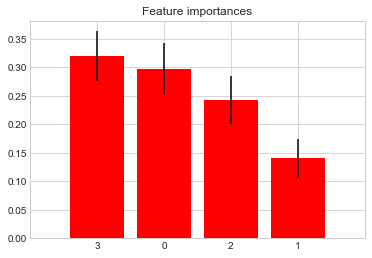

In [122]:
importances = trainedforest.feature_importances_
std = np.std([tree.feature_importances_ for tree in trainedforest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(Selected_X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(Selected_X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(Selected_X.shape[1]), indices)
plt.xlim([-1, Selected_X.shape[1]])
plt.show()

In [124]:
from sklearn.linear_model import LassoCV

regr = LassoCV(cv=5, random_state=101)
regr.fit(X_train,Y_train)
print("LassoCV Best Alpha Scored: ", regr.alpha_)
print("LassoCV Model Accuracy: ", regr.score(X_test, Y_test))
model_coef = pd.Series(regr.coef_, index = list(X.columns[:]))
print("Variables Eliminated: ", str(sum(model_coef == 0)))
print("Variables Kept: ", str(sum(model_coef != 0)))

LassoCV Best Alpha Scored:  0.012928860188742874
LassoCV Model Accuracy:  0.1583625899645006
Variables Eliminated:  8
Variables Kept:  8


Text(0.5, 1.0, 'Most Important Features Identified using Lasso (!0)')

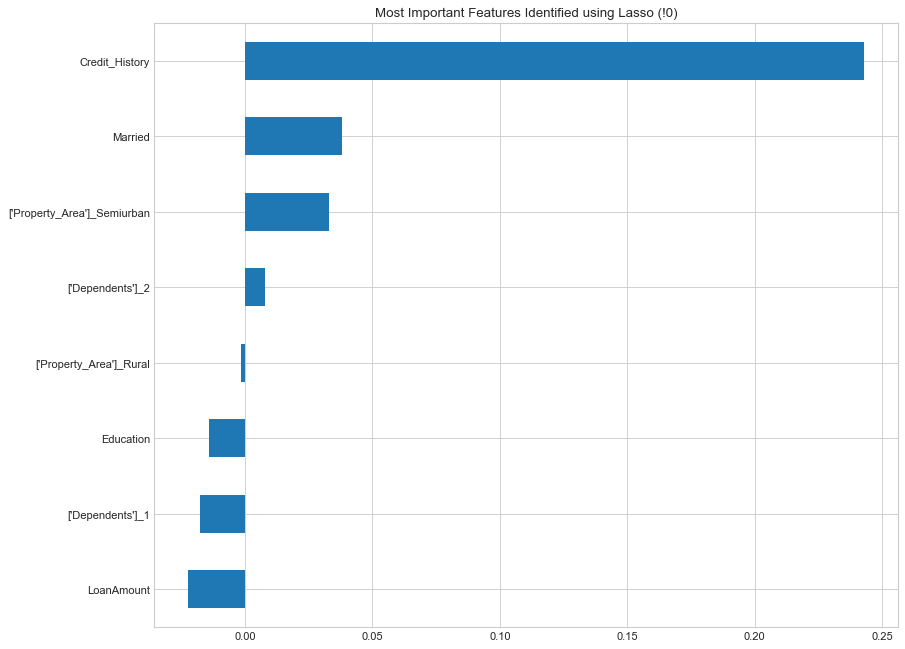

In [125]:
figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')

top_coef = model_coef.sort_values()
top_coef[top_coef != 0].plot(kind = "barh")
plt.title("Most Important Features Identified using Lasso (!0)")